# Utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from jupyterthemes import jtplot
import matplotlib as mpl
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy
import xarray as xr
from shapely.geometry.polygon import LinearRing
from matplotlib import colors
import pickle
jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [2]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [3]:
model_names = ['HadGEM3-GC3-1MM','CanESM5','CESM2','IPSL-CM6A-LR']
model_names_ttls = ['HadGEM3-GC31-MM','CanESM5','CESM2','IPSL-CM6A-LR']
lat_keys = [False,True,True,True]

In [4]:
tos_keys = dict(zip(model_names,['tos','tos','TS','tos']))
prcp_keys = dict(zip(model_names,['precipitation_flux','pr','PRECC','pr']))

In [5]:
aidcs = [[0,80*12],[0,80*12],[0+11,80*12+11],[0,80*12]]
cidcs = [[20*12,100*12],[20*12,100*12],[100*12+11,180*12+11],[60*12,140*12]]
aslices1 = dict(zip(model_names,aidcs))
cslices1 = dict(zip(model_names,cidcs))
aslices = aslices1
cslices = cslices1
aslicesm = aslices1
cslicesm = cslices1

In [6]:
aidcs = [[0,80],[0,80],[1,81],[0,80]]
cidcs = [[20,100],[20,100],[101,181],[60,140]]
aslicesy = dict(zip(model_names,aidcs))
cslicesy = dict(zip(model_names,cidcs))

In [7]:
aidcs = [[0,-1],[0,-1],[0,-1],[0,-1]]
cidcs = [[0,-1],[0,-1],[0,-1],[0,-1]]
aslices_full = dict(zip(model_names,aidcs))
cslices_full = dict(zip(model_names,cidcs))

In [8]:
extent_boxes = {'am1': [-20, -90, -30, 16],
                'am3': [-20, -90, -30, 16],
 'wam4': [40, -25, -15, 30],
 'ism1': [65, 90, 0, 30],
 'easm2': [105, 145, 5, 45]}

In [9]:
idc = [[60,140],[60,140],[60,140],[60,140]]
co2_slicesy = dict(zip(model_names,idc))
idc = [[60*12,140*12],[60*12,140*12],[60*12,140*12],[60*12,140*12]]
co2_slicesm = dict(zip(model_names,idc))

In [10]:
boxes_latlon = [[285-360,317.5-360,-15,-5,],
    [295-360,315-360,-15,-5],
    [-75,-60,0,10],
    [-75,-50,-10,0],
    [-50,-40,-15,-5],
    [-20,20,9,20],
    [-20,20,0,10],
    [-20,20,5,15],
   [-75,-55,-5,5],
   [-20,25,5,20],
   [70,85,5,25],
    [110,140,10,40]]
boxes_dict = {
    'am1': [285,317.5,-15,-5],
    'am2' :[295,315,-15,-5],
     'pam1':   [360-75,360-60,0,10],
    'pam2': [360-75,360-50,-10,0],
    'pam3': [360-50,360-40,-15,-5],
    'wam1': [360-20,360+20,9,20],
    'wam2': [360-20,360+20,0,10],
    'wam3': [360-20,360+20,5,15],
    'am3':[360-75,360-55,-5,5],
    'wam4':[360-20,25,5,20],
    'ism1':[70,85,5,25],
    'easm2':[110,140,10,40]
}

In [11]:
extent_latlon = {
            'am':[-20, -85,-30, 30],
            'af':[35, -30,-30, 30],
            'in':[60, 100,0, 30],
            'as':[100, 150,15,50]}

In [12]:
labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)']

# AMOC1

In [14]:
with open('/p/tmp/mayayami/amoc26N.pkl', 'rb') as f:
    amoc = pickle.load(f)

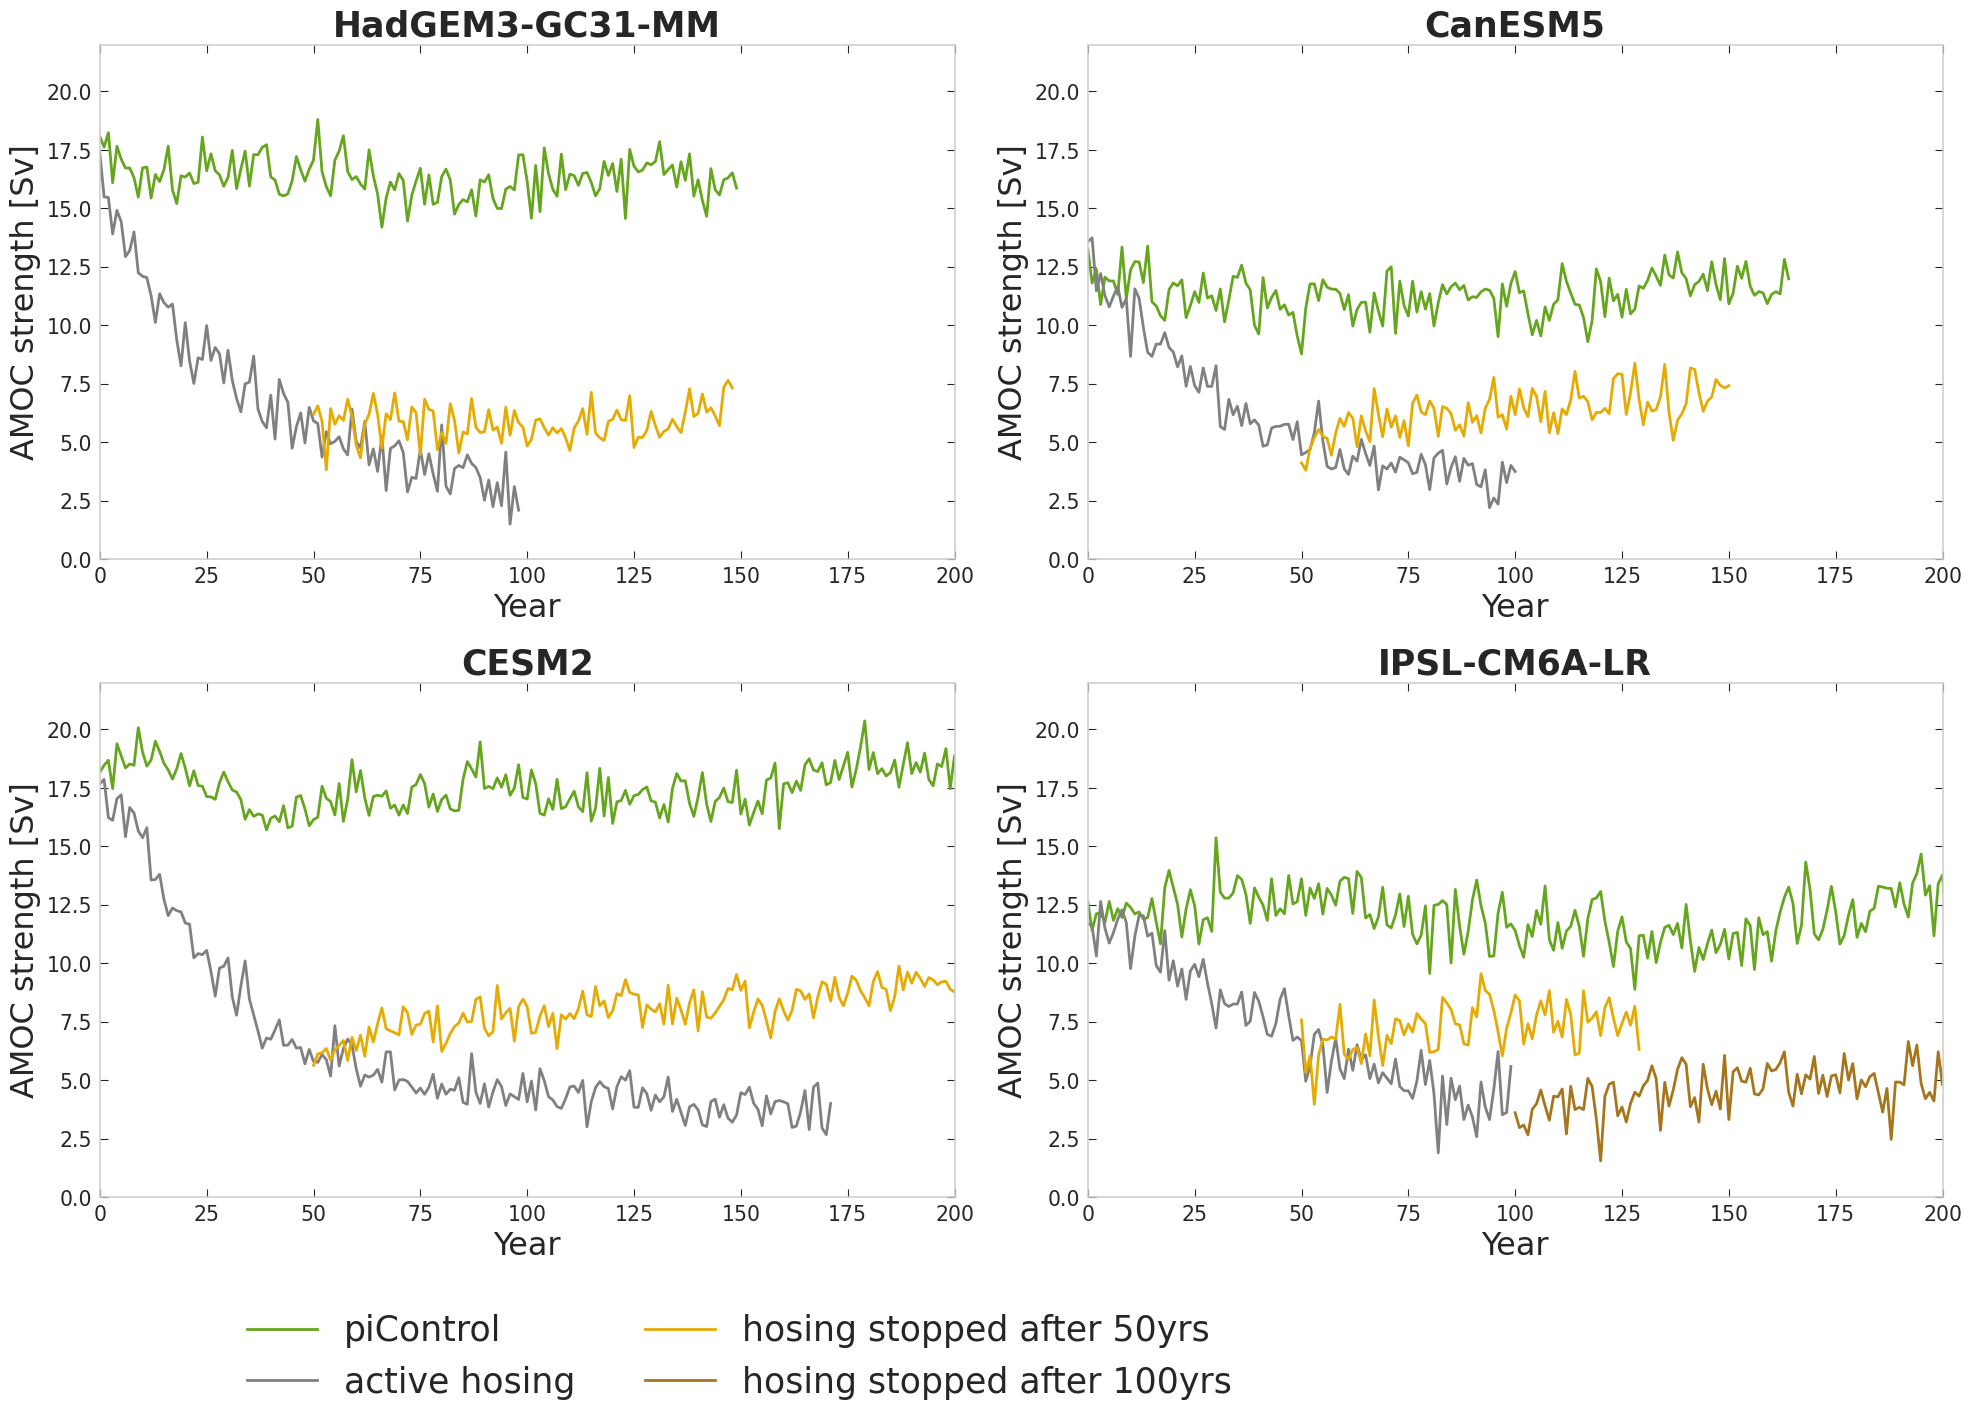

In [34]:
m = 'CESM2'

model_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
model_colors2 = ['#a6d854','#ffd92f','#b3b3b3','#e5c494']
fig, axs = plt.subplots(2,2,figsize = (20,13))
for i, ax in enumerate(axs.flatten()):
    m = model_names[i]
    ax.plot(amoc[m]['con'],'C4',lw=2, label='piControl')

    ax.plot(amoc[m]['hos'],'grey',lw=2, label='active hosing')
#     if len(amoc[m]['r20'])>0:
#         ax.plot(np.arange(len(amoc[m]['r20']))+20.,amoc[m]['r20'],'b')
    if len(amoc[m]['r50'])>0:
        ax.plot(np.arange(len(amoc[m]['r50']))+50.,amoc[m]['r50'],'C5',lw=2,label='hosing stopped after 50yrs')
#     if len(amoc[m]['r70'])>0:
#         ax.plot(np.arange(len(amoc[m]['r70']))+70.,amoc[m]['r70'],'C1',lw=2)
    if len(amoc[m]['r100'])>0:
        ax.plot(np.arange(len(amoc[m]['r100']))+100.,amoc[m]['r100'],'C6',lw=2, label='hosing stopped after 100yrs')
    ax.set_title(model_names_ttls[i],fontsize=25,fontweight='bold')
    ax.set_xlim(0,200)
    ax.set_ylim(0,22)
    ax.set_xlabel('Year')
    ax.set_ylabel('AMOC strength [Sv]')
fig.tight_layout()
plt.legend(bbox_to_anchor=(-1, -0.2), loc='upper left', borderaxespad=0., fontsize=25,fancybox=False,frameon=False,ncol=2)
fig.savefig('../reps/AMOC_hosing_precip/plots/full_amoc.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/full_amoc.png',bbox_inches='tight')
plt.show()

# Maps grid of precipitation change

In [18]:
diff_prcp_Cgrid = {}

for model in model_names:
    adata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/aprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][aslicesm[model][0]:aslicesm[model][1]]
    cdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/cprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][cslicesm[model][0]:cslicesm[model][1]]

    diff_prcp_Cgrid[model] = (cdata.mean(dim='time'))-(adata.mean(dim='time'))
ens_mean_diff = (diff_prcp_Cgrid[model_names[0]]+diff_prcp_Cgrid[model_names[1]]+diff_prcp_Cgrid[model_names[2]]+diff_prcp_Cgrid[model_names[3]])/4

hsign = np.sign(diff_prcp_Cgrid['HadGEM3-GC3-1MM'])


/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [13]:
aprcpy = {}
cprcpy = {}
diff_prcp = {}

for model in model_names:
    adata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/aprcpy.nc'.format(model))[prcp_keys[model]][aslicesy[model][0]:aslicesy[model][1]]
    cdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/cprcpy.nc'.format(model))[prcp_keys[model]][cslicesy[model][0]:cslicesy[model][1]]
    
    aprcpy[model]=adata
    cprcpy[model]=cdata
    diff_prcp[model]=(cdata.mean(dim='time'))-(adata.mean(dim='time'))

/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


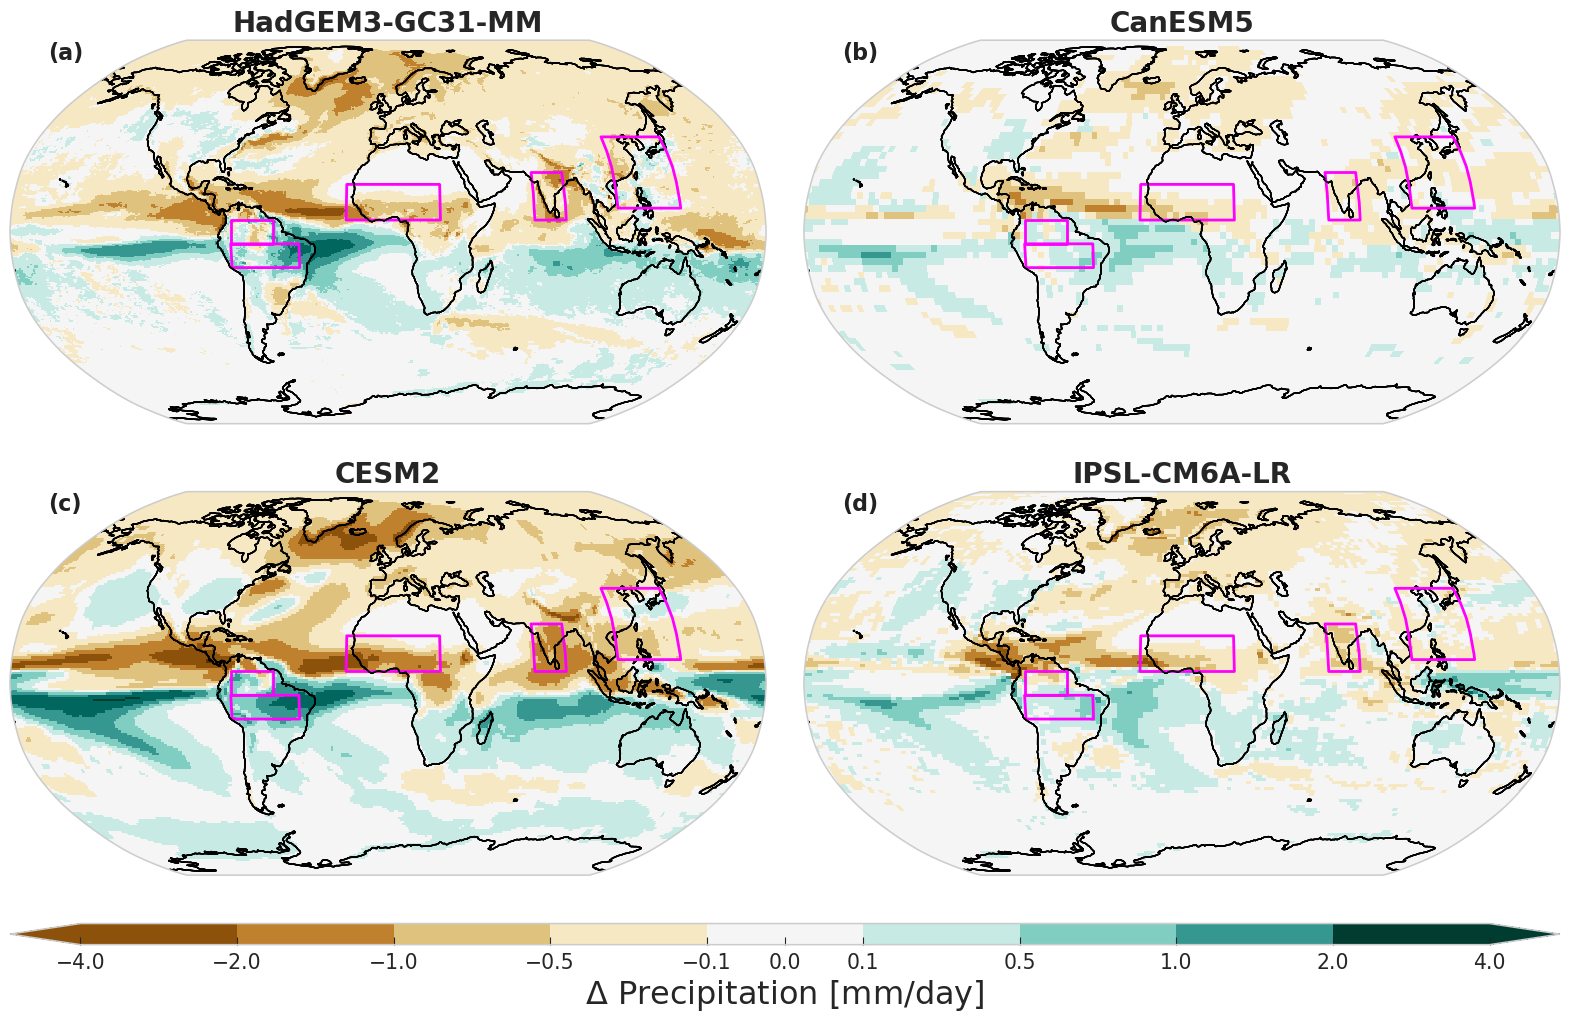

In [37]:
colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3b = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']

levelss = [-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4]
levelss = [-4,-2,-1,-0.5,0,0.5,1,2,4]
levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
mpl.rcParams['hatch.color'] = 'gray'

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(nrows=3, ncols=2,height_ratios=(1,1,0.05))
axs =  [fig.add_subplot(gs[0,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[0,1],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[1,1],projection=ccrs.Robinson())]

for i, model in enumerate(model_names):
    ax = axs[i]
    data = diff_prcp[model]
    if (np.min(data)>=-4):
        cols = colorss3
    else:
        cols = colorss3b
    data.plot(colors=cols,
                     add_colorbar=False,
                 levels = levelss2,ax=ax,transform = ccrs.PlateCarree())
#     match.plot.contourf(levels = [-100,100],hatches=['..'],colors='none',add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines(linewidth=1,alpha=0.6)
    ax.set_title(model_names_ttls[i],fontsize=20,fontweight='bold')

    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=2)
    ax.text(0.05,0.95,labels[i],transform=ax.transAxes,color='k',fontweight='bold')
    
# fig.suptitle('Total Precipitation Anomaly | (Weak AMOC)-(Control)',fontsize=20,y=1.05,fontweight='bold')

cax = fig.add_subplot(gs[2,:])
cmap = mpl.colors.ListedColormap(colorss3)
norm = mpl.colors.BoundaryNorm(levelss2, cmap.N)
mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss3,boundaries=levelss3,norm=norm,
                            orientation='horizontal',label='$\Delta$ Precipitation [mm/day]',extend='both')
fig.subplots_adjust(hspace=0.1,wspace=0.05)



fig.savefig('reps/AMOC_hosing_precip/plots/prcp_models.png',bbox_inches='tight')
fig.savefig('reps/AMOC_hosing_precip/plots/prcp_models.pdf',bbox_inches='tight')
plt.show()

# Ensemble mean map

In [14]:
seas_prcp_Cgrid = {}

for model in model_names:
    adata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/aprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][aslicesm[model][0]:aslicesm[model][1]]
    cdata = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/vars/cprcpm_Cgrid.nc'.format(model))[prcp_keys[model]][cslicesm[model][0]:cslicesm[model][1]]

    seas_prcp_Cgrid[model] = (season_mean(cdata))-(season_mean(adata))
ens_mean_seas_diff = (seas_prcp_Cgrid[model_names[0]]+seas_prcp_Cgrid[model_names[1]]+seas_prcp_Cgrid[model_names[2]]+seas_prcp_Cgrid[model_names[3]])/4



/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [15]:
sig = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_sign_match.nc')

In [16]:
seas_sigs = {}
for i, season in enumerate(['DJF', 'JJA', 'MAM', 'SON']):
    sig = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/all_sign_match_{}.nc'.format(season))
    seas_sigs[season]=sig

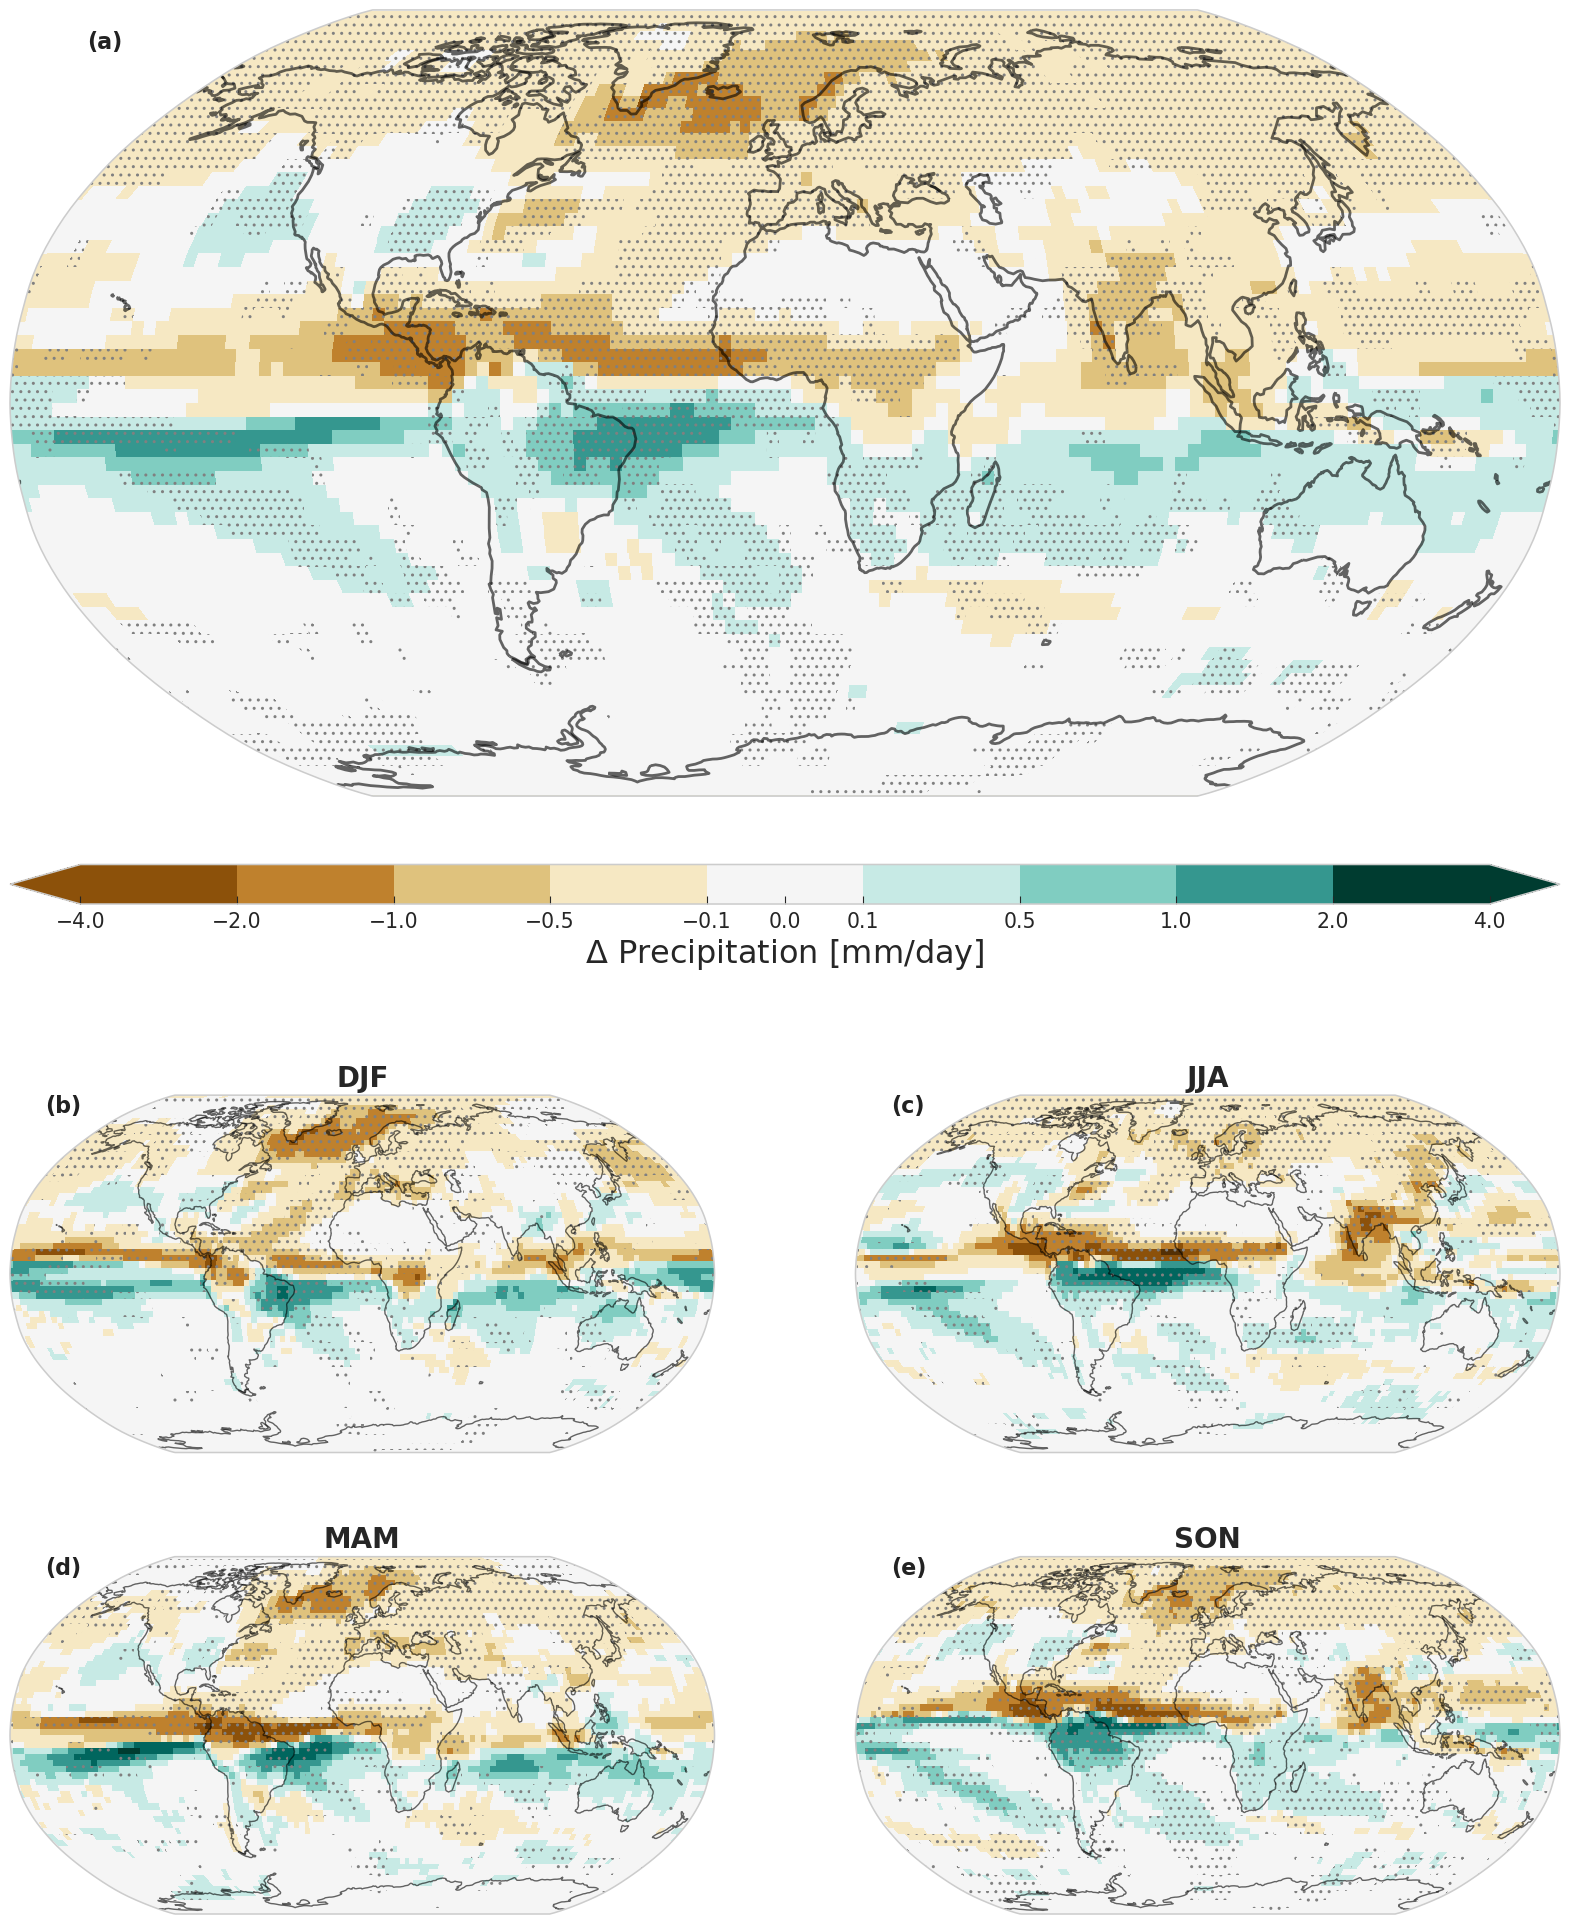

In [24]:
colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
colorss3b = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
levelss = [-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4]
levelss = [-4,-2,-1,-0.5,0,0.5,1,2,4]
levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
mpl.rcParams['hatch.color'] = 'gray'

# levelss = n[]
fig = plt.figure(figsize=(20, 25))
gs = gridspec.GridSpec(nrows=5, ncols=2,width_ratios=(1,1),height_ratios=(1,0.05,0.05,0.5,0.5))



ax =  fig.add_subplot(gs[0,:],projection=ccrs.Robinson())
data = (diff_prcp_Cgrid[model_names[0]]+diff_prcp_Cgrid[model_names[1]]+diff_prcp_Cgrid[model_names[2]]+diff_prcp_Cgrid[model_names[3]])/4


match = diff_prcp_Cgrid['HadGEM3-GC3-1MM'].where(
                      (np.sign(diff_prcp_Cgrid['CanESM5'])==hsign)&
                    (np.sign(diff_prcp_Cgrid['CESM2'])==hsign)&
                    (np.sign(diff_prcp_Cgrid['IPSL-CM6A-LR'])==hsign)
)
antimatch = diff_prcp_Cgrid['HadGEM3-GC3-1MM'].where(
                      (np.sign(diff_prcp_Cgrid['CanESM5'])!=hsign)|
                    (np.sign(diff_prcp_Cgrid['CESM2'])!=hsign)|
                    (np.sign(diff_prcp_Cgrid['IPSL-CM6A-LR'])!=hsign)
)


data.where(np.isnan(antimatch)).plot(colors=colorss3, add_colorbar=False,levels = levelss2,ax=ax,transform = ccrs.PlateCarree())
sig.data.plot.contourf(levels = [-100,100],hatches=['..'],colors='none',add_colorbar=False,corner_mask=False,ax=ax,transform = ccrs.PlateCarree())
data.where(np.isnan(match)).plot(colors=colorss3, add_colorbar=False,levels = levelss2,ax=ax,transform = ccrs.PlateCarree())


cax = fig.add_subplot(gs[1,:])
cmap = mpl.colors.ListedColormap(colorss3)
norm = mpl.colors.BoundaryNorm(levelss2, cmap.N)
mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss3,boundaries=levelss3,norm=norm,
                            orientation='horizontal',label='$\Delta$ Precipitation [mm/day]',extend='both')
ax.set_global()
ax.set_title('')
ax.coastlines(linewidth=2,alpha=0.6)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.text(0.05,0.95,labels[0],transform=ax.transAxes,color='k',fontweight='bold')

axs =  [fig.add_subplot(gs[3,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[3,1],projection=ccrs.Robinson()),
        fig.add_subplot(gs[4,0],projection=ccrs.Robinson()),
        fig.add_subplot(gs[4,1],projection=ccrs.Robinson())]
for i, season in enumerate(['DJF', 'JJA', 'MAM', 'SON']):
    hsign = np.sign(seas_prcp_Cgrid['HadGEM3-GC3-1MM'][i])

    match = seas_prcp_Cgrid['HadGEM3-GC3-1MM'][i].where(
                      (np.sign(seas_prcp_Cgrid['CanESM5'][i])==hsign)&
                    (np.sign(seas_prcp_Cgrid['CESM2'][i])==hsign)&
                    (np.sign(seas_prcp_Cgrid['IPSL-CM6A-LR'][i])==hsign)
    )
    antimatch = seas_prcp_Cgrid['HadGEM3-GC3-1MM'][i].where(
                      (np.sign(seas_prcp_Cgrid['CanESM5'][i])!=hsign)|
                    (np.sign(seas_prcp_Cgrid['CESM2'][i])!=hsign)|
                    (np.sign(seas_prcp_Cgrid['IPSL-CM6A-LR'][i])!=hsign))
    ax = axs[i]
    data = ens_mean_seas_diff[i]
    if (np.min(data.where(np.isnan(antimatch)))>=-4):
        cols = colorss3
    else:
        cols = colorss3b
    data.where(np.isnan(antimatch)).plot(colors=cols,add_colorbar=False,levels = levelss2,ax=ax,transform = ccrs.PlateCarree())
    sig.data.plot.contourf(levels = [-100,100],hatches=['..'],colors='none',corner_mask=False,add_colorbar=False,ax=ax,transform = ccrs.PlateCarree())
    if (np.min(data.where(np.isnan(match)))>=-4):
        cols = colorss3
    else:
        cols = colorss3b
    data.where(np.isnan(match)).plot(colors=cols,add_colorbar=False,levels = levelss2,ax=ax,transform = ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines(linewidth=1,alpha=0.6)
    ax.set_title(season,fontsize=20,fontweight='bold')
    ax.text(0.05,0.95,labels[i+1],transform=ax.transAxes,color='k',fontweight='bold')


fig.savefig('../reps/AMOC_hosing_precip/plots/prcp_ensmean2.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/prcp_ensmean2.png',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/prcp_ensmean2.jpg',bbox_inches='tight')

plt.show()

# Seasonal rainfall change

In [14]:
# model_boxes = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/boxes.nc')
# aboxes = model_boxes.aprcp
# cboxes = model_boxes.cprcp

model_boxes_cont = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/boxes_cont.nc')
aboxes_cont = model_boxes_cont.aprcp
cboxes_cont = model_boxes_cont.cprcp

obs_boxes = xr.open_dataset('/p/tmp/mayayami/obs_boxes_GPCC.nc').prcp[360:]

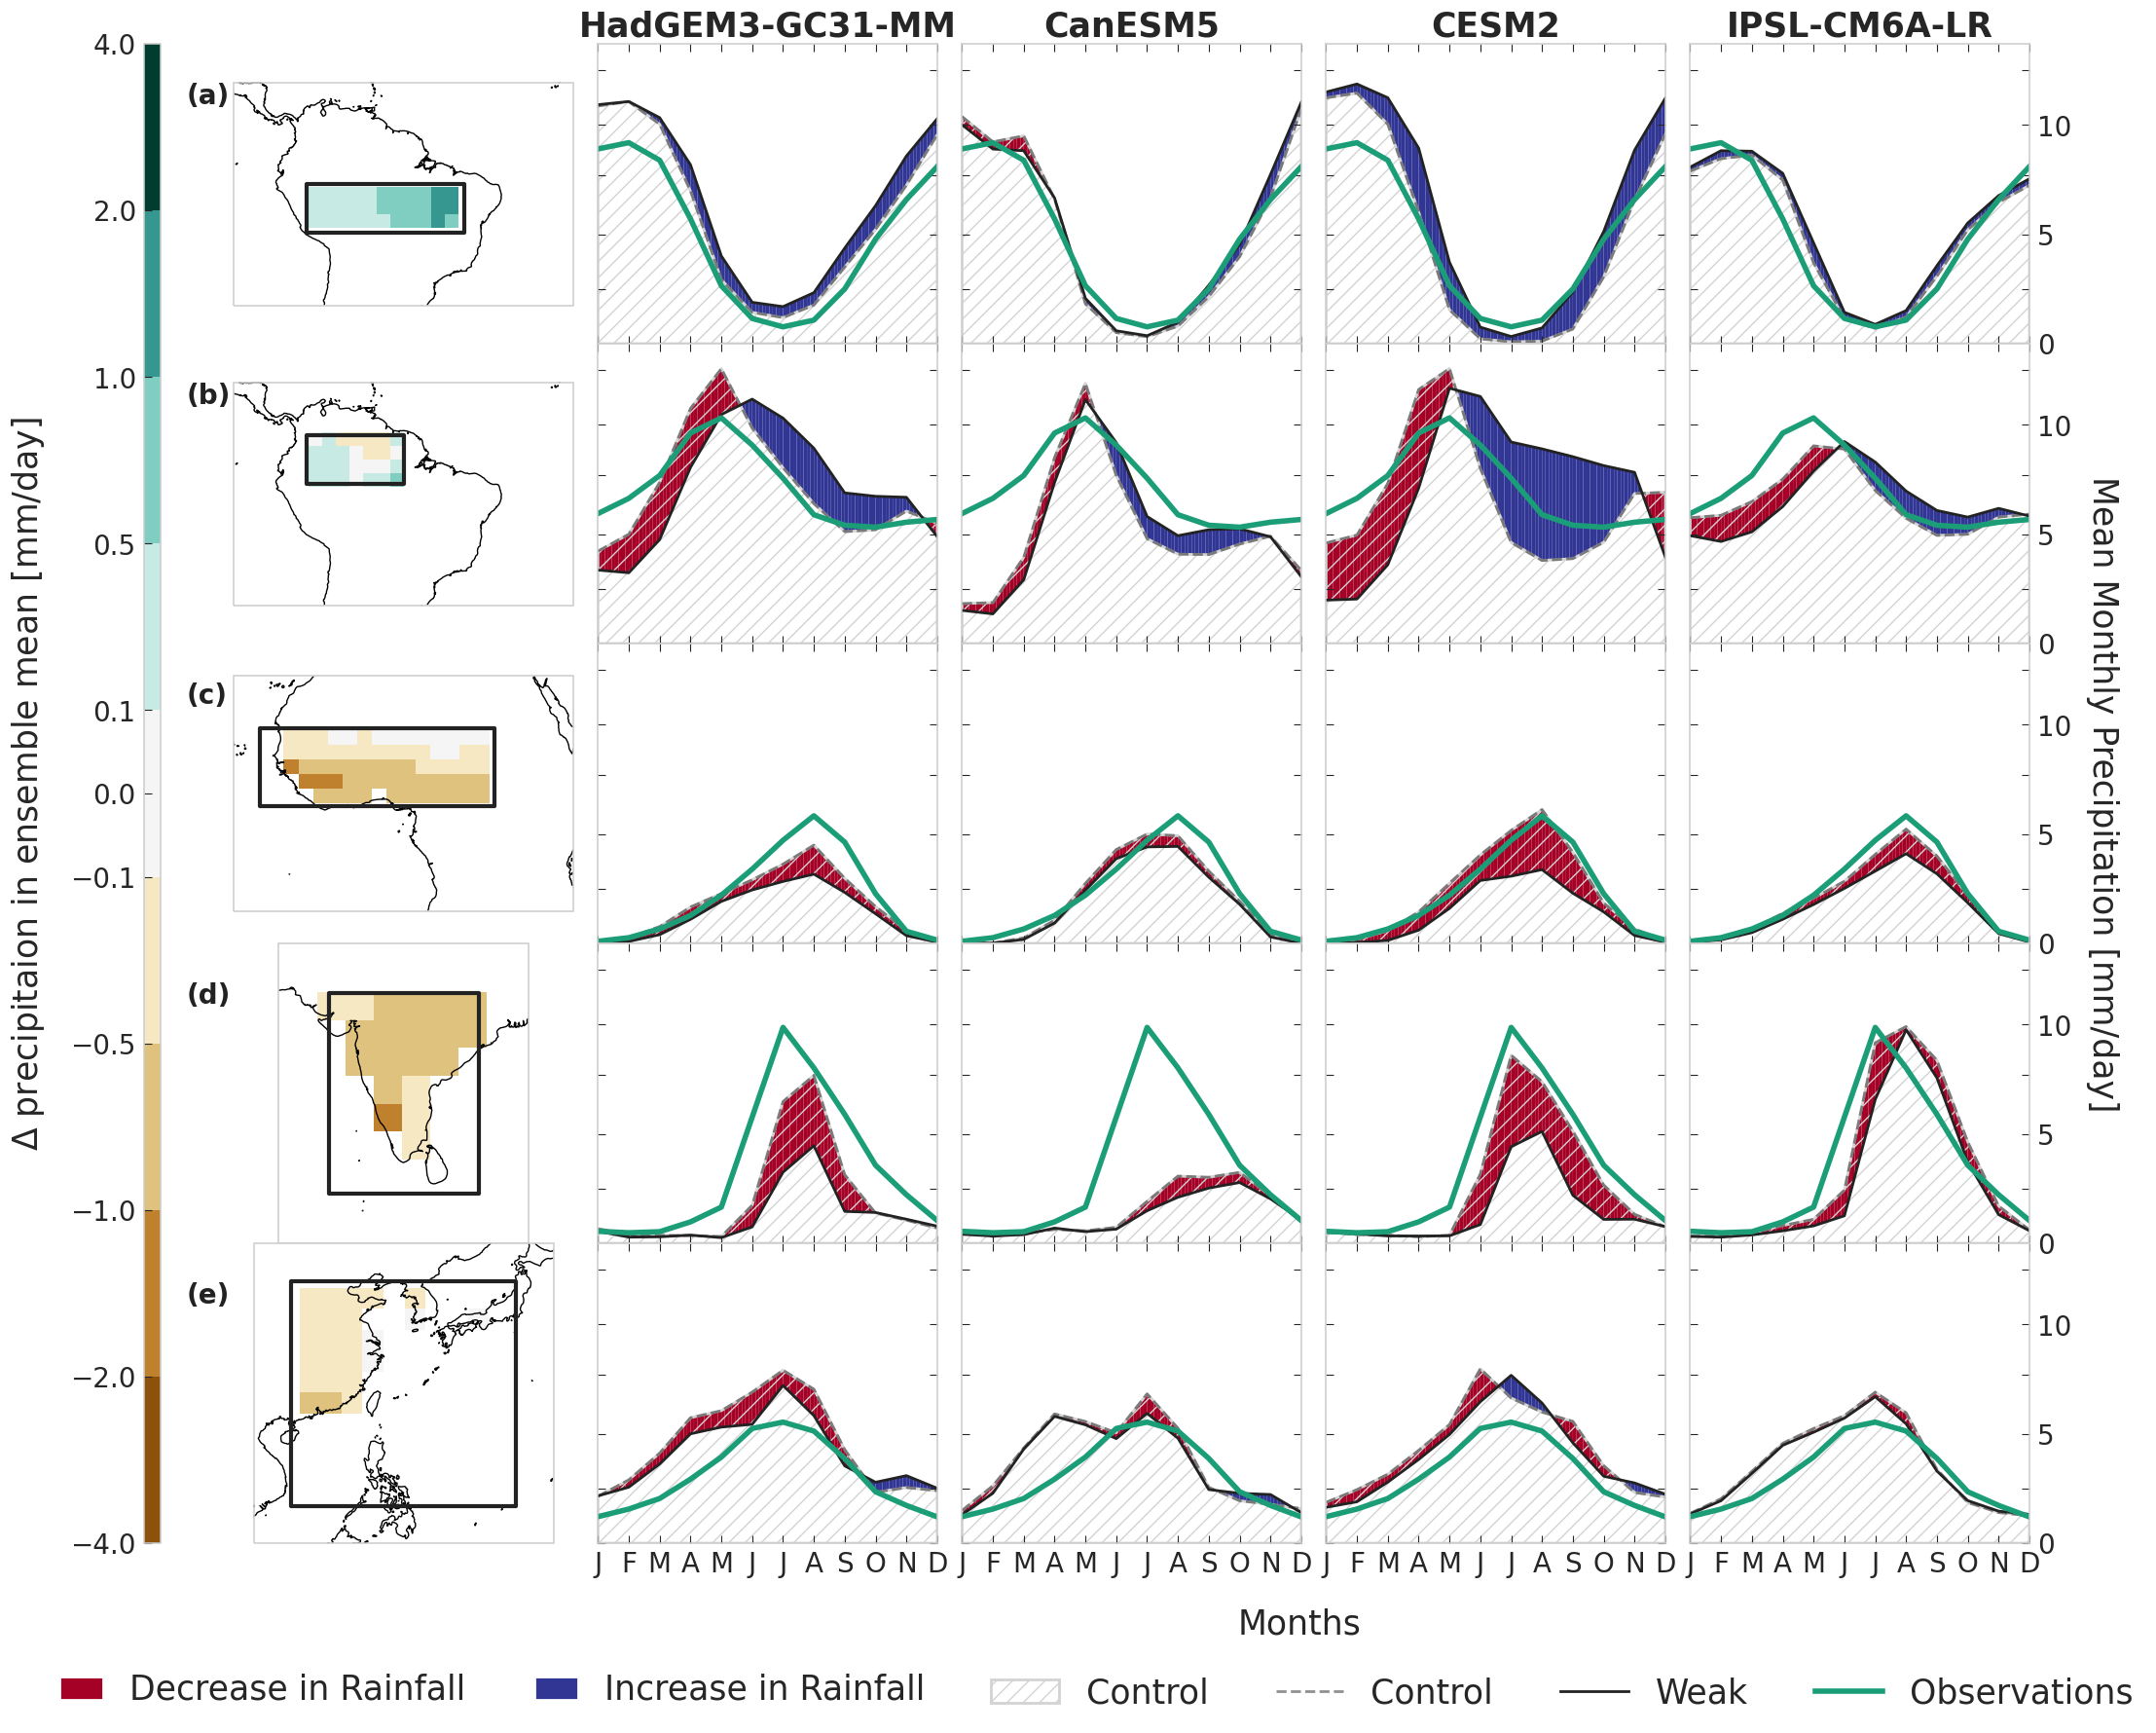

In [48]:
fig = plt.figure(figsize=(25,20))
gs = fig.add_gridspec(5, 7,width_ratios=(0.05,0.07,1,1,1,1,1))

from scipy.interpolate import interp1d
seamask = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/seamask_Cgrid.nc'.format('CanESM5')).topo
seamask2 = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/seamask.nc'.format('HadGEM3-GC3-1MM')).topo



for i, ibox in enumerate([0,8,9,10,11]):
    box = list(boxes_dict.keys())[ibox]
    
    ax = fig.add_subplot(gs[i, 2], projection=ccrs.PlateCarree())
    latlon = boxes_dict[box]
    colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
    levelss2 = [-4,-2,-1,-0.5,-0.1,0.1,0.5,1,2,4]
    levelss3= [-4,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,4]
    data = get_box2(ens_mean_diff,latlon[0],latlon[1],latlon[2],latlon[3],lon=True,drop=False).where(seamask>=1)
#     data = get_box2(diff_prcp['HadGEM3-GC3-1MM'],latlon[0],latlon[1],latlon[2],latlon[3],lon=False,drop=False).where(seamask>=1)
    data.plot(
        colors=colorss3,
        add_colorbar=False,
#                      cbar_kwargs={"label": "$\Delta$ Precipitation [mm/day]",'aspect':40,
#                                                   'ticks':levelss3,
#                       "orientation":'horizontal'},
                     levels = levelss2,
    ax=ax,transform = ccrs.PlateCarree())    
    box_plot2(latlon,col='k')
    ax.set_extent(extent_boxes[box], crs=ccrs.PlateCarree())
    ax = fig.add_subplot(gs[i, 1])
    ax.text(0.05,0.8,labels[i],transform=ax.transAxes,color='k', fontweight='bold',fontsize=20)
    ax.axis('off')
    
    for im, model in enumerate(model_names):
        ax2 = fig.add_subplot(gs[i, 3+im])
        
        cdata = mavg(cboxes_cont.sel(models=model).isel(boxes=ibox).dropna(dim='time')[cslicesm[model][0]:cslicesm[model][1]])
        adata = mavg(aboxes_cont.sel(models=model).isel(boxes=ibox).dropna(dim='time')[aslicesm[model][0]:aslicesm[model][1]])
        
        cf = interp1d(np.arange(0,12),cdata)
        af = interp1d(np.arange(0,12),adata)
        xx = np.linspace(0,11,100)
        cdata2 = cf(xx)
        adata2 = af(xx)
        
        idc1 = np.where(cdata2>=adata2) 
        idc2 = np.where(cdata2<adata2)

        dx = np.diff(xx)[0]
        for idx in idc1[0]:
            if idx<99:
                if xx[idx+1] in xx[idc1]:
                    ax2.fill_between(xx[idx:idx+2],
                             cdata2[idx:idx+2],
                             adata2[idx:idx+2],
    #                               facecolor='#018571',lw=2)
                                facecolor='#313695',lw=2)
        for idx in idc2[0]:
            if idx<99:
                if xx[idx+1] in xx[idc2]:
                    idx = int(idx)
                    ax2.fill_between(xx[idx:idx+2],
                             cdata2[idx:idx+2],
                             adata2[idx:idx+2],
    #                               facecolor='#a6611a',lw=2)
                                facecolor ='#a50026',lw=2)

        ax2.fill_between(np.arange(0,12),
                 adata,0,
                      facecolor='none',hatch='//',edgecolor='lightgrey',alpha=1,lw=2,label='Control')
        ax2.plot(np.arange(0,12),
                     adata,
                          color='k',lw=2,label='Control',alpha=0.5,linestyle='--')
        ax2.plot(np.arange(0,12),
                 cdata,
                      color='k',lw=2,label='Weak')
        
        ax2.plot(np.arange(0,12),
             mavg(obs_boxes.isel(boxes=ibox).dropna(dim='time')),
                  color='C0',lw=4,label='Observations',linestyle='-')
# #         ax2.scatter(np.arange(0,12),
#                      mavg(aboxes.sel(models=model).isel(boxes=ibox).dropna(dim='time')),
#                           color='C0',lw=2,alpha=0.5)
#         ax2.scatter(np.arange(0,12),
#                  mavg(cboxes.sel(models=model).isel(boxes=ibox).dropna(dim='time')),
#                       color='C1',lw=2)

#         ax2.axhline(y=0, color='k', alpha=0.5)
        ax2.set_ylim(0,13.7)
        ax2.set_xlim(0,11)
    
        ax2.set_xticks(np.arange(0,12))
        ax2.set_xticklabels([mon[0] for mon in months])
#         ax2.legend()
        ax2.set_yticks([0,2.5,5,7.7,10,12.5])
        ax2.tick_params(axis='x', which='both',labelbottom=False, labelsize=20)
        ax2.tick_params(axis='y', which='both',labelleft=False)
    
        if im==3:
            ax2.set_yticklabels([0,'',5,'',10,''])
            ax2.tick_params(axis='y', which='both',labelright=True,labelsize=20)
            if i==2:
                ax2.set_ylabel('Mean Monthly Precipitation [mm/day]',rotation=270,labelpad=35,fontsize=25)
                ax2.yaxis.set_label_position("right")
        if i==4:
            ax2.set_xlabel('')
            ax2.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=True, labelsize=20)
        else:
            ax2.set_title('')
        if i==0:
            ax2.set_title(model_names_ttls[im],fontweight='bold',fontsize=25)
fig.supxlabel('Months',fontsize=25,x=0.6,y=0.06)

cax = fig.add_subplot(gs[0:5, 0])
cmap = mpl.colors.ListedColormap(colorss3)
norm = mpl.colors.BoundaryNorm(levelss2, cmap.N)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levelss3,boundaries=levelss2,norm=norm,
                            orientation='vertical')            
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
cbar.ax.tick_params(labelsize=20)

fig.supylabel('$\Delta$ precipitaion in ensemble mean [mm/day]',fontsize=25,x=0.07)

ax2.text(-4.6,-0.52,'Decrease in Rainfall',transform=ax2.transAxes,fontsize=25)
ax2.text(-3.2,-0.52,'Increase in Rainfall',transform=ax2.transAxes,fontsize=25)
leg_rect2 = mpl.patches.Rectangle((-3.4,-0.52), 0.12, 0.07, transform=ax2.transAxes,fill=True,alpha=1,color='#313695',clip_on=False)
ax2.add_patch(leg_rect2)
leg_rect2 = mpl.patches.Rectangle((-4.8,-0.52), 0.12, 0.07, transform=ax2.transAxes,fill=True,alpha=1,color='#a50026',clip_on=False)
ax2.add_patch(leg_rect2)
# ax2.plot([1.05,1.6],[0.9,0.9],transform=ax2.transAxes,color='k',clip_on=False,linewidth=2)   
# ax2.text(1.05,0.8,'Retrieval Uncertainty',transform=ax2.transAxes,fontsize=fontsize-5,fontweight='bold')


ax2.legend(bbox_to_anchor=(-2.1, -0.4), loc='upper left', borderaxespad=0., fontsize=25,fancybox=False,frameon=False,ncol=4)
fig.subplots_adjust(hspace=0,wspace=0.1)
fig.patch.set_facecolor('white')
# fig.suptitle('Change in the precipitation seasonal cycle',y=0.93,fontsize=25)
fig.savefig('reps/AMOC_hosing_precip/plots/seasonal.pdf',bbox_inches='tight')
fig.savefig('reps/AMOC_hosing_precip/plots/seasonal.png',bbox_inches='tight')

plt.show()


# Dry season length

In [15]:
extent_latlon = {'am': [-25, -90, -30, 21],
 'wam': [40, -25, -17.5, 32.5],
 'ism': [60, 95, 0, 30],
 'easm': [100, 150, 5, 45]}

In [16]:
region_dict = {
        'am':[360-85,360-30,-20,11],
        'wam': [360-20,35,-10,25],
        'ism': [70, 85, 5, 25],
        'easm':[110,140,10,40]}

In [29]:
dmap5 = {}
dmap4 = {}
wmap7 = {}
wmap6 = {}

for model in model_names:
    dmapp5 = {}
    dmapp4 = {}
    wmapp7 = {}
    wmapp6 = {}
    for region, extent in region_dict.items():
        dmapp5[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_dmap_{}_q5.nc'.format(model,region))
        dmapp4[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_dmap_{}_q4.nc'.format(model,region))
        wmapp7[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_wmap_{}_q7.nc'.format(model,region))
        wmapp6[region] = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/dry_maps/{}_wmap_{}_q6.nc'.format(model,region))

        
    dmap5[model]=dmapp5
    dmap4[model]=dmapp4
    wmap7[model]=wmapp7
    wmap6[model]=wmapp6

In [30]:
def colorbar(cax,cols,levels,label):
    cmap = mpl.colors.ListedColormap(cols)
    norm = mpl.colors.BoundaryNorm(levels, cmap.N)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap,ticks=levels,boundaries=levels,norm=norm,
                                orientation='vertical',label=label,extend='both')
    cax.set_ylabel(label,fontsize=25)
    cax.yaxis.set_label_position("right")

In [31]:
reg_names = ['SAM','WAM','ISM','EASM']

bla
bla
bla
bla


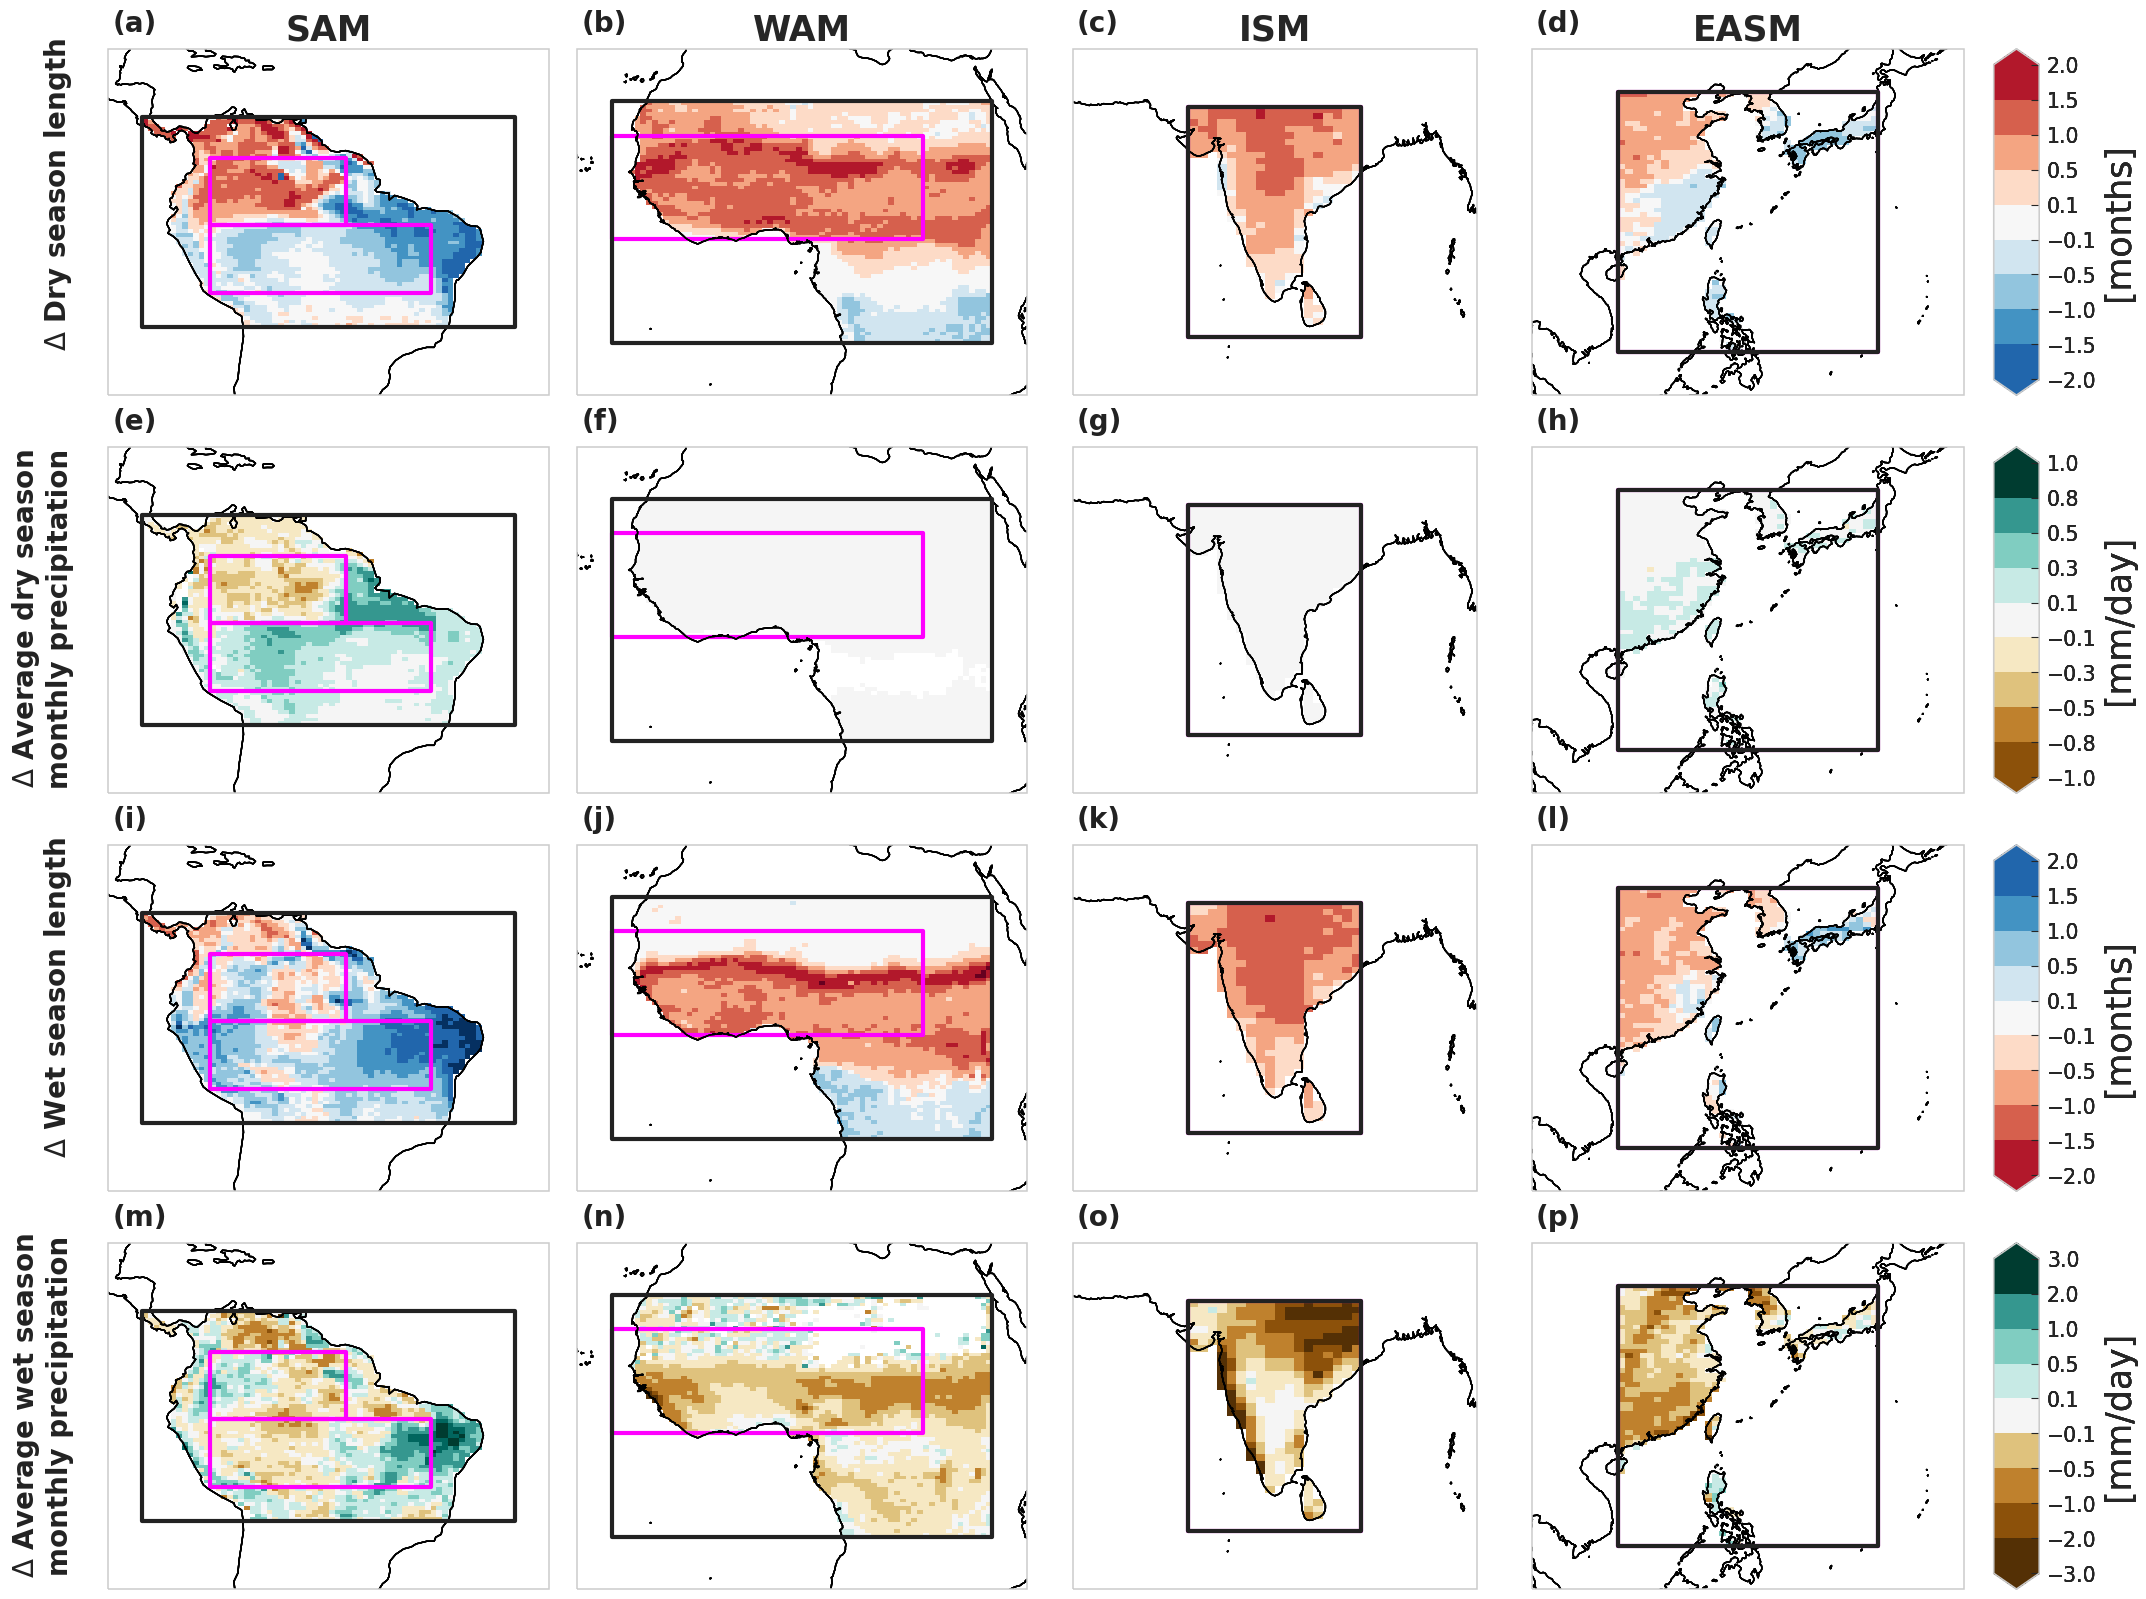

In [32]:
fig = plt.figure(figsize=(25, 20))
gs = gridspec.GridSpec(nrows=4, ncols=5,width_ratios=(1,1,1,1,0.1))
model ='HadGEM3-GC3-1MM'
seamask = xr.open_dataset('/p/tmp/mayayami/NAHosMIP/{}/seamask.nc'.format(model)).topo
im = 0
diff_colorss = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
diff_colorss2 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e']
colorss3 = ['#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']    
colorss = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']    
colorss2 = ['#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac'] 

diff_colorss3 = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
diff_colorss3b = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
xlbl=0.01
ylbl=1.05

for ie, region in enumerate(region_dict.keys()):
    extent = extent_latlon[region]
    region_box = region_dict[region]
    
    ## PLOT 1
    ax = fig.add_subplot(gs[0, ie], projection=ccrs.PlateCarree())
   
    levelss = np.linspace(-2,2,10)
    levelss = [-2,-1.5,-1,-0.5,-0.1,0.1,0.5,1,1.5,2]
    ####
    data = (dmap4[model][region].cdlen1.mean(dim='year') - dmap4[model][region].adlen.mean(dim='year')).where(seamask==1)
    ####

    colorbar(fig.add_subplot(gs[0, 4]),colorss2[::-1],levelss,'[months]')

    if region=='wam':
        if (np.min(data.where(data.longitude<180,drop=True))>min(levelss)):
            cols = colorss2[::-1]
        else:
            cols = colorss[::-1]
        data.where(data.longitude<180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
        if (np.min(data.where(data.longitude>180,drop=True))>min(levelss)):
            cols = colorss2[::-1]
        else:
            cols = colorss[::-1]
        data.where(data.longitude>180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    else:
        data.plot(colors=colorss2[::-1],
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=3)
    box_plot2(region_box,col='k')
    ax.set_title(reg_names[ie],fontsize=25,fontweight='bold')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.text(xlbl,ylbl,labels[ie],transform=ax.transAxes,color='k',fontweight='bold',fontsize=20)
    

    
    ## PLOT 2
    ax = fig.add_subplot(gs[1, ie], projection=ccrs.PlateCarree())
    levelss = np.linspace(-1,1,10)
    levelss = [-1,-0.8,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.8,1]
    #####
    data = (((dmap4[model][region].cdprcp1/dmap4[model][region].cdlen1).mean(dim='year'))
            -((dmap4[model][region].adprcp/dmap4[model][region].adlen).mean(dim='year'))).where(seamask==1)
    #####
    if (np.min(data)>min(levelss)):
        print('bla')
        cols = diff_colorss3
    else:
        cols = diff_colorss3b
    colorbar(fig.add_subplot(gs[1, 4]),cols,levelss,'[mm/day]')
    
    if region=='wam':
        if (np.min(data.where(data.longitude<180,drop=True))>min(levelss)):
            cols = diff_colorss3
        else:
            cols = diff_colorss3b
        data.where(data.longitude<180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
        if (np.min(data.where(data.longitude>180,drop=True))>min(levelss)):
            cols = diff_colorss3
        else:
            cols = diff_colorss3b
        data.where(data.longitude>180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    else:
        data.plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=3)
    box_plot2(region_box,col='k')
    ax.set_title('')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.text(xlbl,ylbl,labels[4+ie],transform=ax.transAxes,color='k',fontweight='bold',fontsize=20)
    
    
    ## PLOT 3
    ax = fig.add_subplot(gs[2, ie], projection=ccrs.PlateCarree())
   
    levelss = np.linspace(-2,2,10)
    levelss = [-2,-1.5,-1,-0.5,-0.1,0.1,0.5,1,1.5,2]
    ####
    data = (wmap6[model][region].cwlen1.mean(dim='year') - wmap6[model][region].awlen.mean(dim='year')).where(seamask==1)
    ####

    colorbar(fig.add_subplot(gs[2, 4]),colorss2,levelss,'[months]')

    if region=='wam':
        if (np.min(data.where(data.longitude<180,drop=True))>min(levelss)):
            cols = colorss3
        else:
            cols = colorss
        data.where(data.longitude<180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
        if (np.min(data.where(data.longitude>180,drop=True))>min(levelss)):
            cols = colorss3
        else:
            cols = colorss
        data.where(data.longitude>180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    else:
        data.plot(colors=colorss3,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=3)
    box_plot2(region_box,col='k')
    ax.set_title('')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.text(xlbl,ylbl,labels[8+ie],transform=ax.transAxes,color='k',fontweight='bold',fontsize=20)
    
    ## PLOT 4
    ax = fig.add_subplot(gs[3, ie], projection=ccrs.PlateCarree())
    levelss = np.linspace(-3,3,10)
    levelss = [-3,-2,-1,-0.5,-0.1,0.1,0.5,1,2,3]
    ####
    data = (((wmap6[model][region].cwprcp1/wmap6[model][region].cwlen1).mean(dim='year'))
            -((wmap6[model][region].awprcp/wmap6[model][region].awlen).mean(dim='year'))).where(seamask==1)
    ####

    if (np.min(data)>min(levelss)):
        print(model)
        cols = diff_colorss3
    else:
        cols = diff_colorss3b

    colorbar(fig.add_subplot(gs[3, 4]),cols,levelss,'[mm/day]')

    if region=='wam':
        if (np.min(data.where(data.longitude<180,drop=True))>min(levelss)):
            cols = diff_colorss3
        else:
            cols = diff_colorss3b
        data.where(data.longitude<180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
        if (np.min(data.where(data.longitude>180,drop=True))>min(levelss)):
            cols = diff_colorss3
        else:
            cols = diff_colorss3b
        data.where(data.longitude>180,drop=True).plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    else:
        data.plot(colors=cols,
             add_colorbar=False,
             levels = levelss,ax=ax,transform = ccrs.PlateCarree())
    ax.set_title('')
    for ibox in [0,8,9,10,11]:
        latlon = list(boxes_dict.values())[ibox]
        box_plot2(latlon,col='magenta',lw=3)
    box_plot2(region_box,col='k')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.text(xlbl,ylbl,labels[12+ie],transform=ax.transAxes,color='k',fontweight='bold',fontsize=20)
    
    if ie==0:
        ax.text(-0.15, 3.6, '$\Delta$ Dry season length', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold')
        ax.text(-0.15, 2.33, '$\Delta$ Average dry season\nmonthly precipitation', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold',ha='center')
        ax.text(-0.15, 1.27, '$\Delta$ Wet season length', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold')
        ax.text(-0.15, 0.05, '$\Delta$ Average wet season\nmonthly precipitation', color='k', transform=ax.transAxes, fontsize=20,rotation='vertical',fontweight='bold',ha='center')

    
# fig.suptitle('Changes in dry and wet season | Weak - piControl | HadGEM3-GC3-1MM | Version 1',y=0.95,fontsize=25)    
fig.subplots_adjust(hspace=0.15,wspace=0.05)  
fig.patch.set_facecolor('white')
fig.savefig('reps/AMOC_hosing_precip/plots/seasons.png',bbox_inches='tight')
fig.savefig('reps/AMOC_hosing_precip/plots/seasons.pdf',bbox_inches='tight')
plt.show()

# model agreement

In [25]:
def box_plot5(latlon,col='#6a3d9a',lw=3,has=None):
    min_lon = latlon[0]
    max_lon = latlon[1]
    min_lat = latlon[2]
    max_lat = latlon[3]
    if min_lon>180:
        min_lon=min_lon-360
    if max_lon>180:
        max_lon=max_lon-360
    latsq = [min_lat, max_lat, max_lat, min_lat]
    lonsq = [min_lon, min_lon, max_lon, max_lon]
    ring = LinearRing(list(zip(lonsq, latsq)))
    ax.coastlines(linewidth=1)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')
    ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='None', edgecolor=col,linewidth=lw,hatch=has)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')

In [22]:
region_names = ['Global','No Poles','Extratropics','Tropics','S AM','N AM','WAM','ISM','EASM']

In [17]:
gagreement = pd.read_csv('geographic_agreement.txt',index_col=0)
magreement = pd.read_csv('monthly_agreement.txt',index_col=0)

In [18]:
region_frac, co2_region_frac, ssp585_region_frac, ssp126_region_frac = gagreement['Hosing'], gagreement['4xCO2'], gagreement['SSP585'],gagreement['SSP126']
mon_region_frac, mon_co2_region_frac, mon_ssp585_region_frac, mon_ssp126_region_frac = magreement['Hosing'], magreement['4xCO2'], magreement['SSP585'],magreement['SSP126']



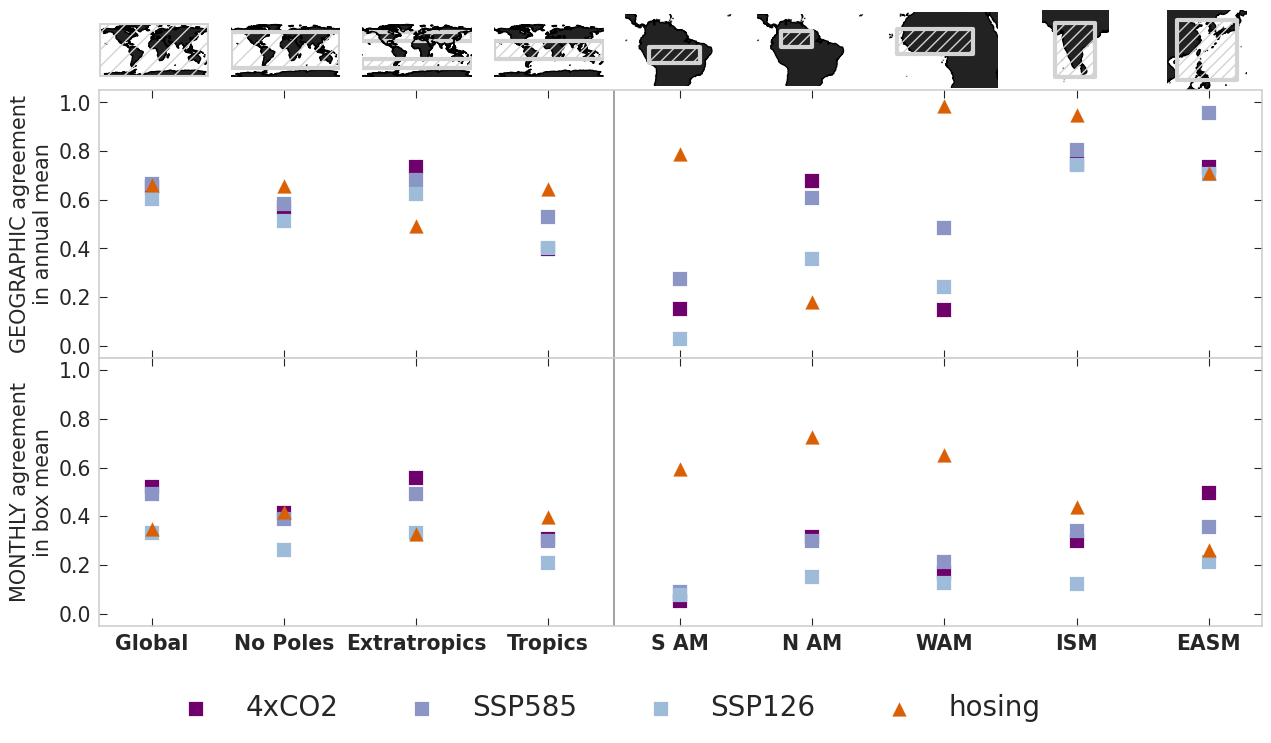

In [27]:
fig = plt.figure(figsize=(15,8),facecolor='white')

gs = fig.add_gridspec(3, 9,height_ratios=(0.3,1,1))

ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
box_plot5([-180,180,-90,90],col='lightgrey',has='//')

ax = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
box_plot5([-180,180,-60,60],col='lightgrey',has='//')

ax = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
box_plot5([-180, 180, 30,60],col='lightgrey',has='///')
box_plot5([-180, 180, -60,-30],col='lightgrey',has='///')

ax = fig.add_subplot(gs[0, 3], projection=ccrs.PlateCarree())
box_plot5([-180,180,-30,30],col='lightgrey',has='///')


for i, ibox in enumerate([0,8,9,10,11]):
    box = list(boxes_dict.keys())[ibox]
    
    ax = fig.add_subplot(gs[0, i+4], projection=ccrs.PlateCarree())
    latlon = boxes_dict[box]
    box_plot5(latlon,col='lightgrey',has='///')
    ax.set_extent(extent_boxes[box], crs=ccrs.PlateCarree())  


xx = np.arange(0,9)
ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(xx,co2_region_frac,s=100,color='#6e016b',marker='s')
ax1.scatter(xx,ssp585_region_frac,s=100,color='#8c96c6',marker='s')
ax1.scatter(xx,ssp126_region_frac,s=100,color='#9ebcda',marker='s')
ax1.scatter(xx,region_frac,s=100,color='C1',marker='^')
ax1.vlines(3.5,-10,10,color='k',alpha=0.5)

ax1.set_ylim(-0.05,1.05)
ax1.set_ylabel('GEOGRAPHIC agreement\nin annual mean',fontsize=15)
ax2 = fig.add_subplot(gs[2,:],sharex=ax1)
ax2.scatter(xx,mon_co2_region_frac,s=100,color='#6e016b',label='4xCO2',marker='s')
ax2.scatter(xx,mon_ssp585_region_frac,s=100,color='#8c96c6',label='SSP585',marker='s')
ax2.scatter(xx,mon_ssp126_region_frac,s=100,color='#9ebcda',label='SSP126',marker='s')
ax2.scatter(xx,mon_region_frac,s=100,color='C1',label='hosing',marker='^')
ax2.vlines(3.5,-10,10,color='k',alpha=0.5)

ax2.set_ylim(-0.05,1.05)
ax2.set_xticks(xx)
ax2.set_ylabel('MONTHLY agreement\nin box mean',fontsize=15)
ax2.set_xticklabels(region_names,fontweight='bold')
ax2.legend(bbox_to_anchor=(0.05, -0.4), loc='lower left', borderaxespad=0., facecolor='white', framealpha=0,fontsize=20,fancybox=False,frameon=True,ncol=4)
fig.subplots_adjust(hspace=0)
# fig.suptitle('Model agreement',fontsize=25,y=0.85,x=0.2)
fig.savefig('../reps/AMOC_hosing_precip/plots/agreement_comparison.pdf',bbox_inches='tight')
fig.savefig('../reps/AMOC_hosing_precip/plots/agreement_comparison.png',bbox_inches='tight')
plt.show()